In [1]:
#import libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import plotly as py
import plotly.graph_objs as go
from sklearn.cluster import KMeans
import warnings
import os
warnings.filterwarnings("ignore")

In [2]:
#data exploration
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Projects/Data sets/Mall_Customers.csv")

In [3]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [4]:
df.head

<bound method NDFrame.head of      CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0             1    Male   19                  15                      39
1             2    Male   21                  15                      81
2             3  Female   20                  16                       6
3             4  Female   23                  16                      77
4             5  Female   31                  17                      40
..          ...     ...  ...                 ...                     ...
195         196  Female   35                 120                      79
196         197  Female   45                 126                      28
197         198    Male   32                 126                      74
198         199    Male   32                 137                      18
199         200    Male   30                 137                      83

[200 rows x 5 columns]>

In [5]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [6]:
df.shape

(200, 5)

In [7]:
df.describe

<bound method NDFrame.describe of      CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0             1    Male   19                  15                      39
1             2    Male   21                  15                      81
2             3  Female   20                  16                       6
3             4  Female   23                  16                      77
4             5  Female   31                  17                      40
..          ...     ...  ...                 ...                     ...
195         196  Female   35                 120                      79
196         197  Female   45                 126                      28
197         198    Male   32                 126                      74
198         199    Male   32                 137                      18
199         200    Male   30                 137                      83

[200 rows x 5 columns]>

In [8]:
df.info

<bound method DataFrame.info of      CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0             1    Male   19                  15                      39
1             2    Male   21                  15                      81
2             3  Female   20                  16                       6
3             4  Female   23                  16                      77
4             5  Female   31                  17                      40
..          ...     ...  ...                 ...                     ...
195         196  Female   35                 120                      79
196         197  Female   45                 126                      28
197         198    Male   32                 126                      74
198         199    Male   32                 137                      18
199         200    Male   30                 137                      83

[200 rows x 5 columns]>

In [9]:
df.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [10]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [11]:
#data visualization
plt.style.use("fivethirtyeight")

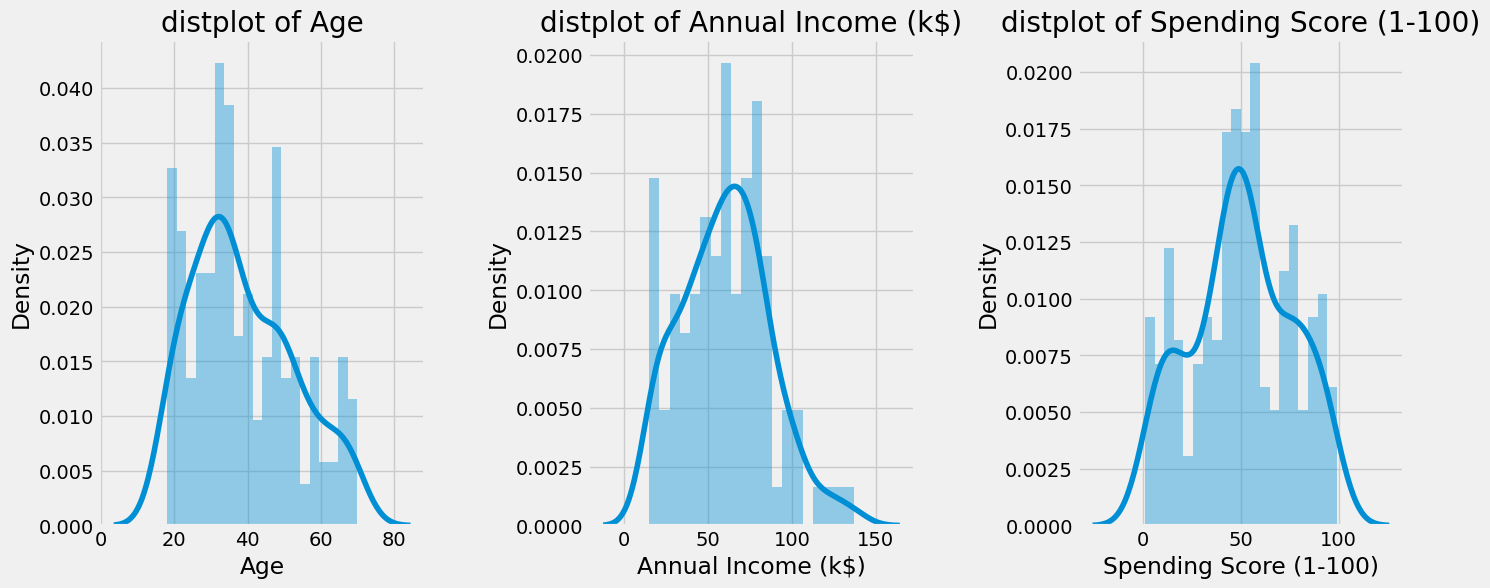

In [12]:
plt.figure(1,figsize=(15,6))
n=0
for x in ['Age','Annual Income (k$)','Spending Score (1-100)']:
  n+=1
  plt.subplot(1,3,n)
  plt.subplots_adjust(hspace=0.5,wspace=0.5)
  sns.distplot(df[x],bins=20)
  plt.title('distplot of {}'.format(x))
plt.show()

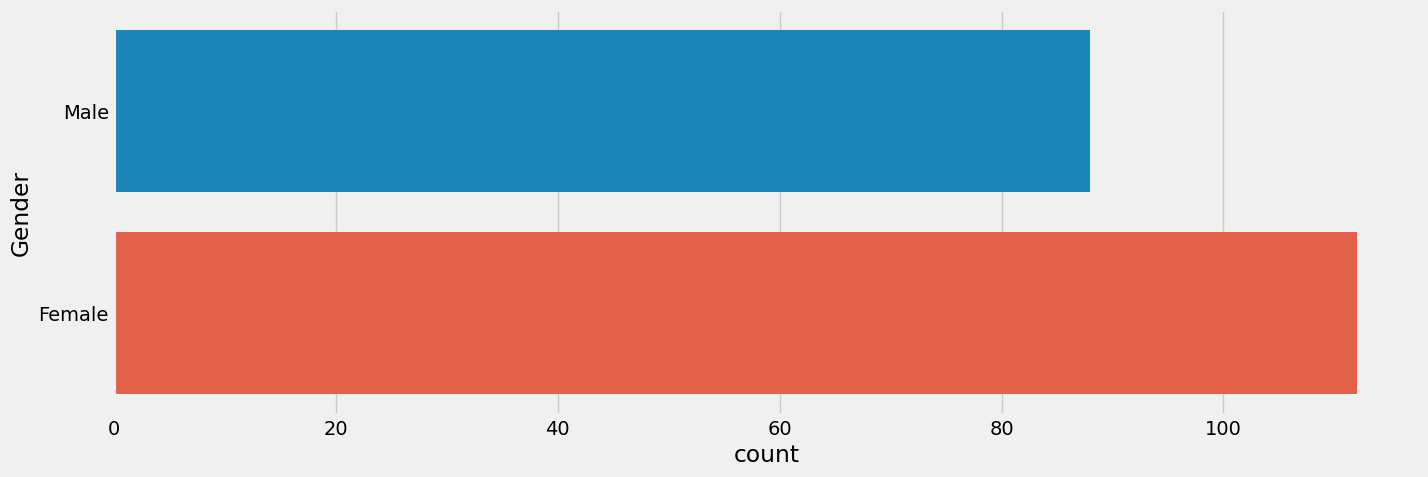

In [13]:
#countplot of gender
plt.figure(1,figsize=(15,5))
sns.countplot(y='Gender',data=df)
plt.show()

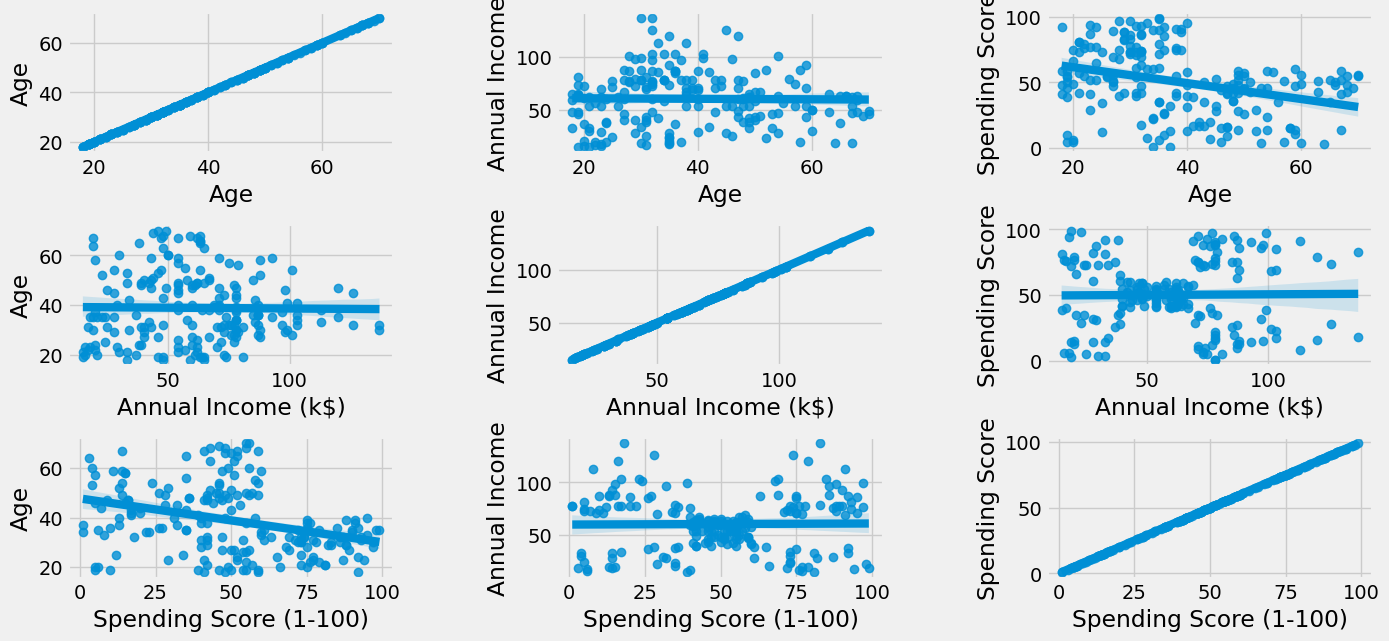

In [14]:
#plotting the relationship between age,anual income and spending score
plt.figure(1,figsize=(15,7))
n=0
for x in ['Age','Annual Income (k$)','Spending Score (1-100)']:
  for y in ['Age','Annual Income (k$)','Spending Score (1-100)']:
    n+=1
    plt.subplot(3,3,n)
    plt.subplots_adjust(hspace=0.5,wspace=0.5)
    sns.regplot(x=x,y=y,data=df)
    plt.ylabel(y.split()[0]+' '+y.split()[1] if len(y.split())>1 else y)
plt.show()

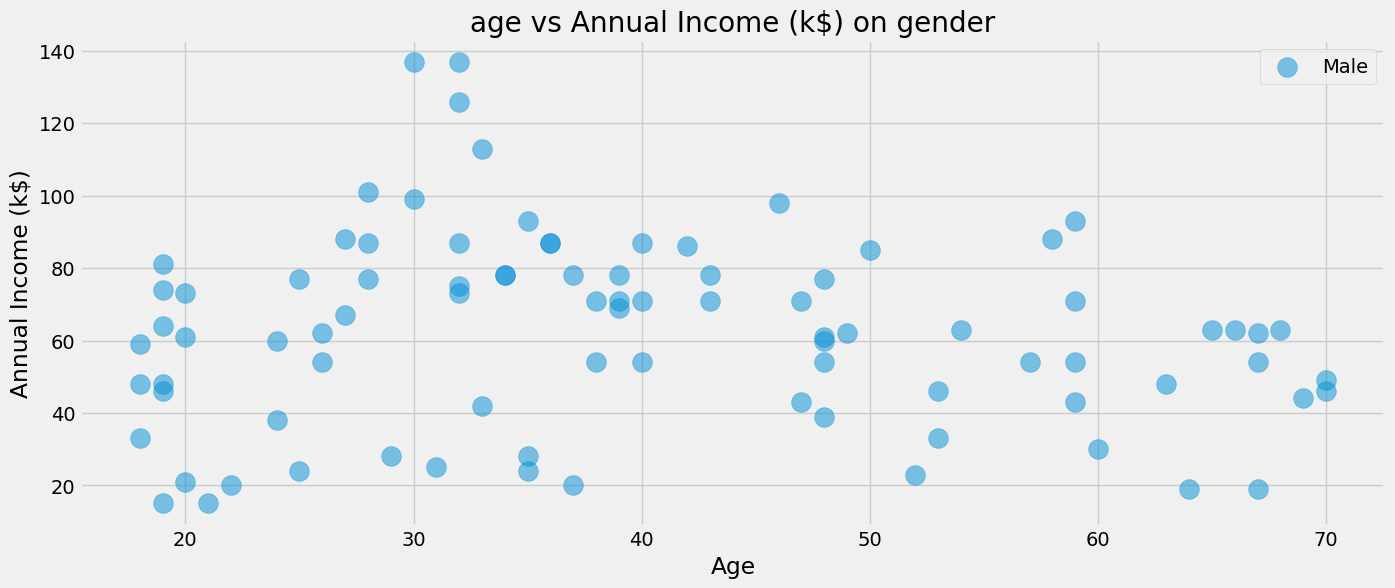

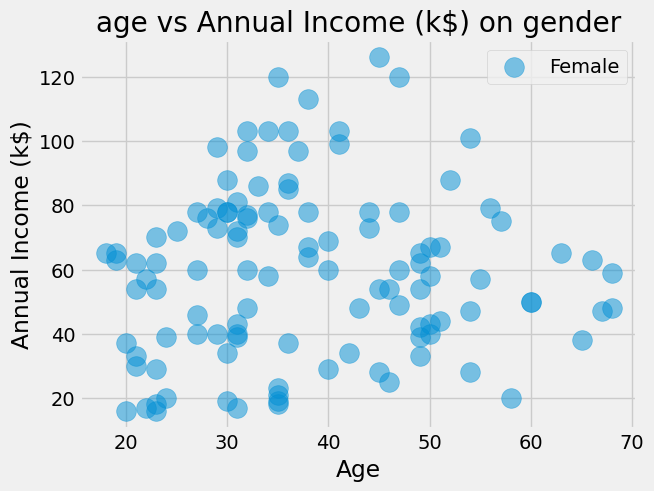

In [15]:
plt.figure(1,figsize=(15,6))
for gender in ['Male','Female']:
  plt.scatter(x = 'Age',y='Annual Income (k$)',data=df[df['Gender']==gender],s=200,alpha=0.5,label=gender)
  plt.xlabel('Age'),plt.ylabel('Annual Income (k$)')
  plt.title('age vs Annual Income (k$) on gender')
  plt.legend()
  plt.show()

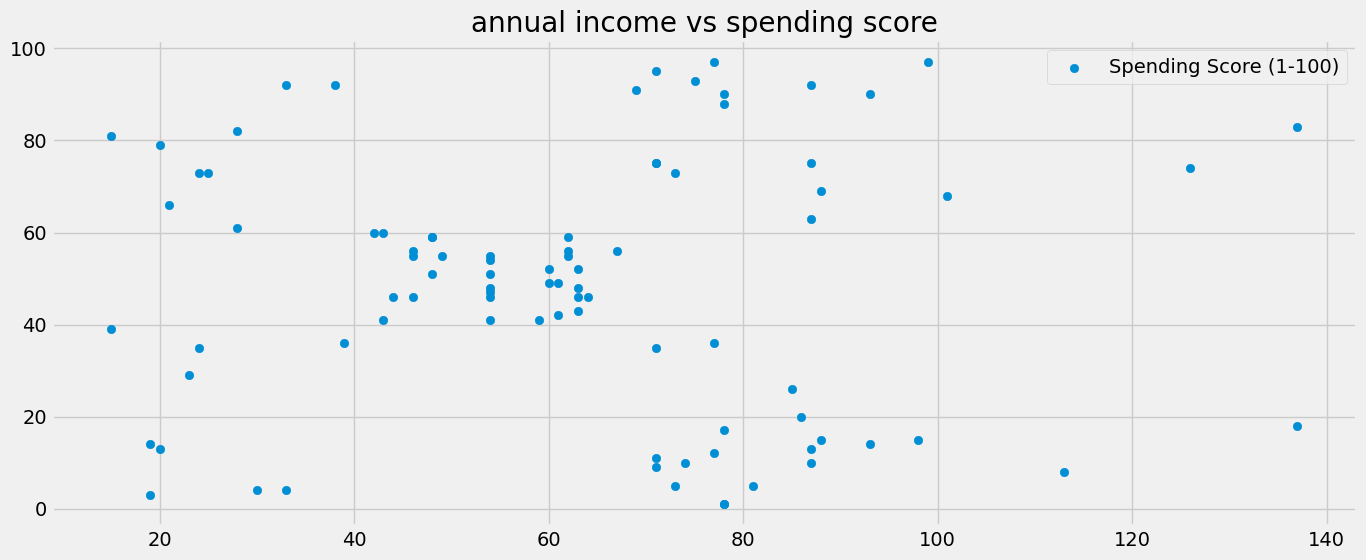

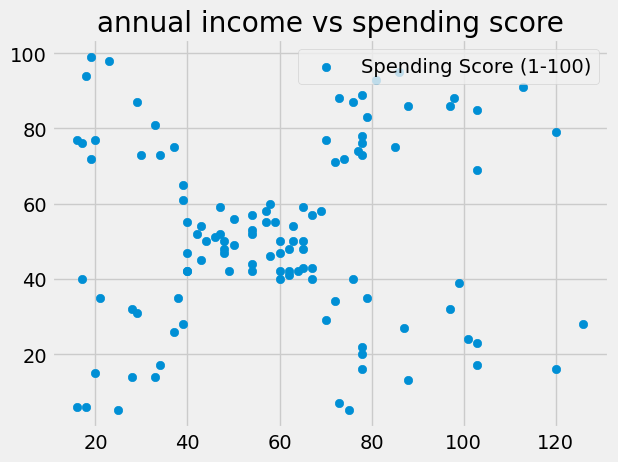

In [16]:
plt.figure(1,figsize=(15,6))
for gender in ['Male','Female']:
  plt.scatter(x='Annual Income (k$)',y='Spending Score (1-100)',data=df[df['Gender']==gender])
  plt.title("annual income vs spending score")
  plt.legend()
  plt.show()

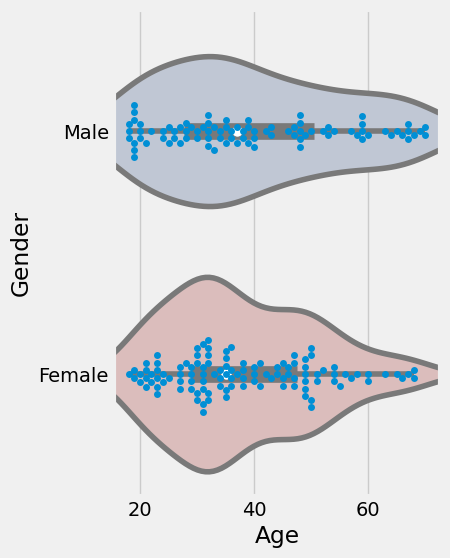

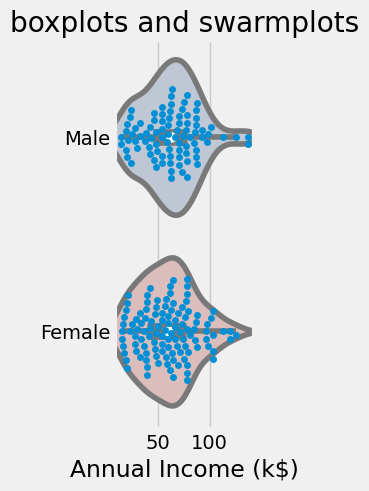

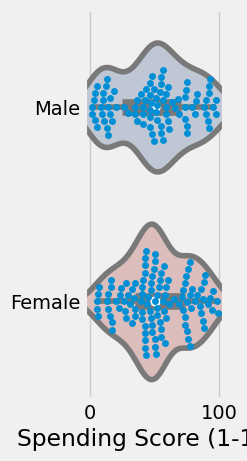

In [17]:
#distribution of values of age , annual income and spending score
plt.figure(1,figsize=(15,6))
n=0
for cols in ['Age','Annual Income (k$)','Spending Score (1-100)']:
  n+=1
  plt.subplot(1,3,n)
  plt.subplots_adjust(hspace=0.5,wspace=0.5)
  sns.violinplot(x=cols,y='Gender',data=df,palette='vlag')
  sns.swarmplot(x=cols,y='Gender',data=df)
  plt.ylabel('Gender' if n==1 else '')
  plt.title('boxplots and swarmplots' if n==2 else '')
  plt.show()

In [18]:
#clustering using k means
#segmentation  using age and spending score
x1 = df[['Age','Spending Score (1-100)']].iloc[: , :].values
inertia = []
for n in range(1,11):
  algorithm = (KMeans(n_clusters= n,init='k-means++',n_init=10,max_iter=300,tol=0.0001,random_state=111,algorithm='elkan'))

  algorithm.fit(x1)
  inertia.append(algorithm.inertia_)

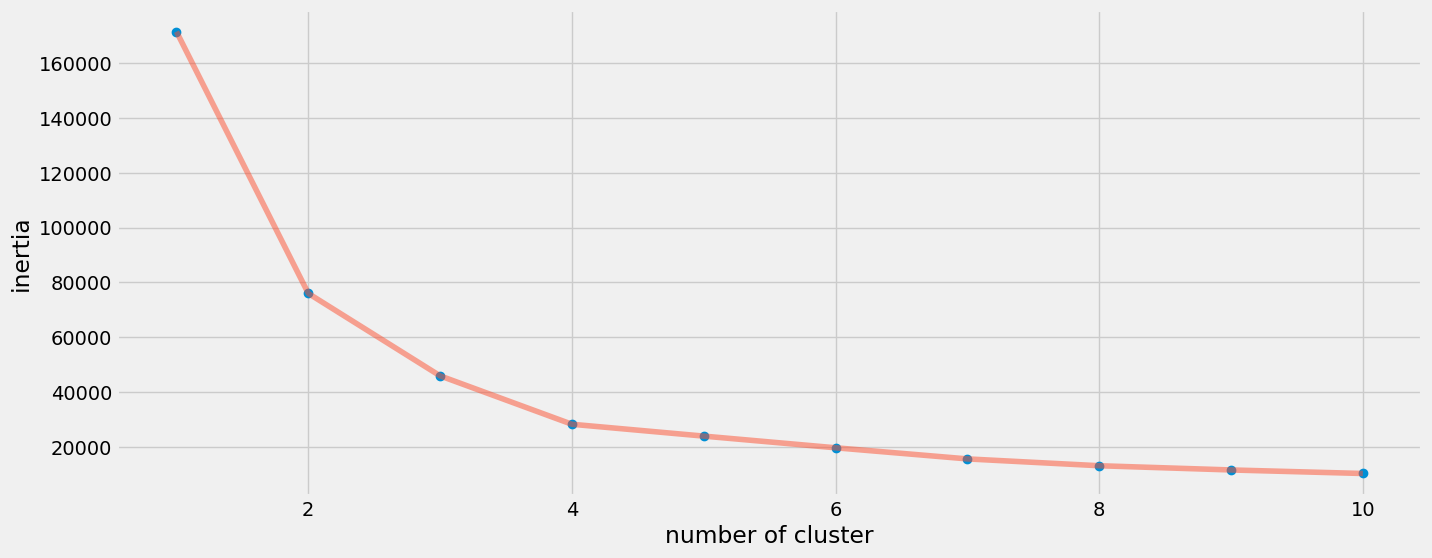

In [19]:
plt.figure(1,figsize=(15,6))
plt.plot(np.arange(1,11),inertia,'o')
plt.plot(np.arange(1,11),inertia,'-',alpha=0.5)
plt.xlabel('number of cluster')
plt.ylabel('inertia')
plt.show()

In [20]:
algorithm = (KMeans(n_clusters = 4,init='k-means++',n_init=10,max_iter=300,tol=0.0001,random_state=111,algorithm='elkan'))
algorithm.fit(x1)
labels1=algorithm.labels_
centroids1 = algorithm.cluster_centers_

In [21]:
h = 0.02
x_min,x_max = x1[:,0].min()-1,x1[:,0].max()+1
y_min,y_max = x1[:,1].min()-1,x1[:,1].max()+1
xx,yy = np.meshgrid(np.arange(x_min,x_max,h),np.arange(y_min,y_max,h))
z=algorithm.predict(np.c_[xx.ravel(),yy.ravel()])

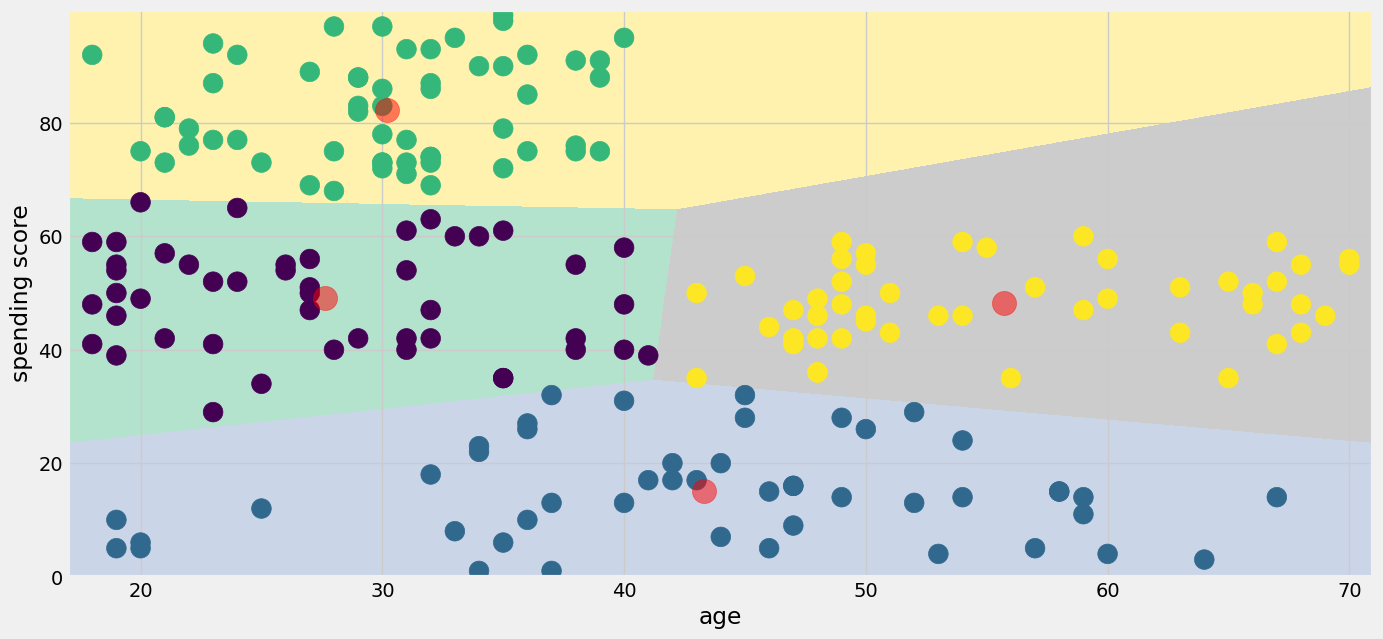

In [22]:
plt.figure(1,figsize=(15,7))
plt.clf()
z = z.reshape(xx.shape)
plt.imshow(z,interpolation='nearest',extent=(xx.min(),xx.max(),yy.min(),yy.max()),cmap=plt.cm.Pastel2,aspect='auto',origin='lower')
plt.scatter(x='Age',y='Spending Score (1-100)',data=df,c=labels1,s=200)
plt.scatter(x=centroids1[:,0],y=centroids1[:,1],s=300,c='red',alpha=0.5)
plt.ylabel('spending score')
plt.xlabel('age')
plt.show()

In [23]:
#segmentation using annual income and spending score
x2=df[['Annual Income (k$)','Spending Score (1-100)']].iloc[:,:].values
inertia=[]
for n in range(1,11):
  algorithm = (KMeans(n_clusters=n,init='k-means++',n_init=10,max_iter=300,tol=0.0001,random_state=111,algorithm='elkan'))
  algorithm.fit(x2)
  inertia.append(algorithm.inertia_)

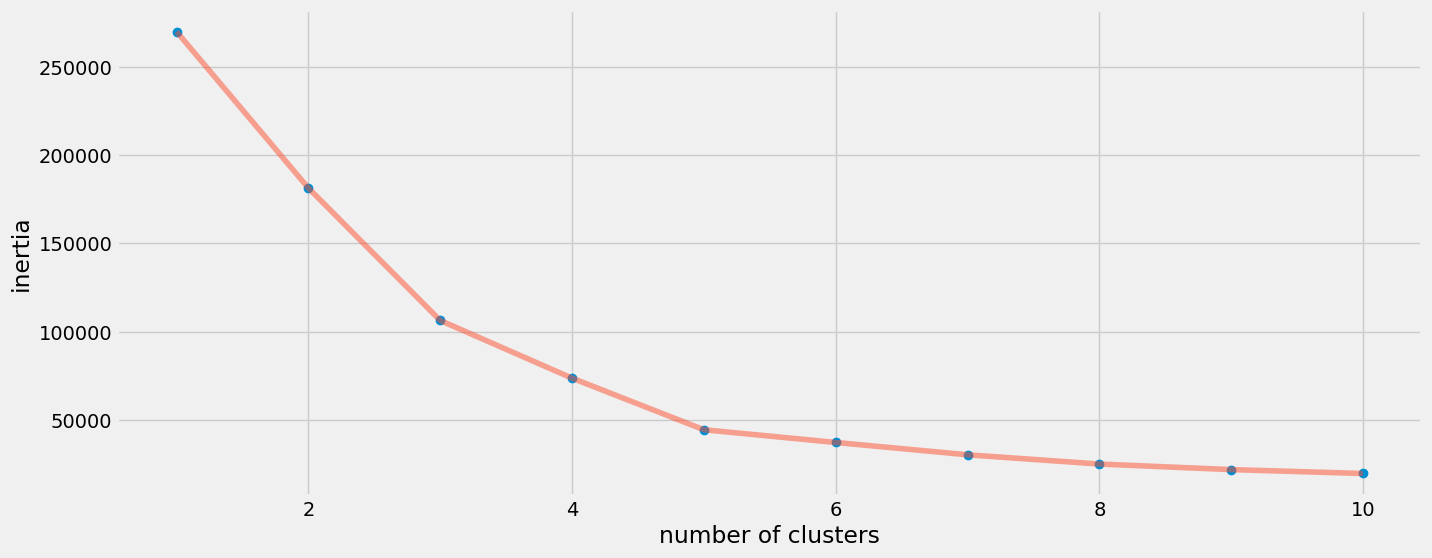

In [24]:
plt.figure(1,figsize=(15,6))
plt.plot(np.arange(1,11),inertia,'o')
plt.plot(np.arange(1,11),inertia,'-',alpha=0.5)
plt.xlabel('number of clusters')
plt.ylabel('inertia')
plt.show()

In [25]:
algorithm = (KMeans(n_clusters=5,init='k-means++',n_init=10,max_iter=300,tol=0.0001,random_state=111,algorithm='elkan'))
algorithm.fit(x2)
labels2=algorithm.labels_
centroids2=algorithm.cluster_centers_

In [26]:
h=0.02
x_min,x_max=x2[:,0].min()-1,x2[:,0].max()+1
y_min,y_max=x2[:,1].min()-1,x2[:,1].max()+1
xx,yy=np.meshgrid(np.arange(x_min,x_max,h),np.arange(y_min,y_max,h))
z2=algorithm.predict(np.c_[xx.ravel(),yy.ravel()])


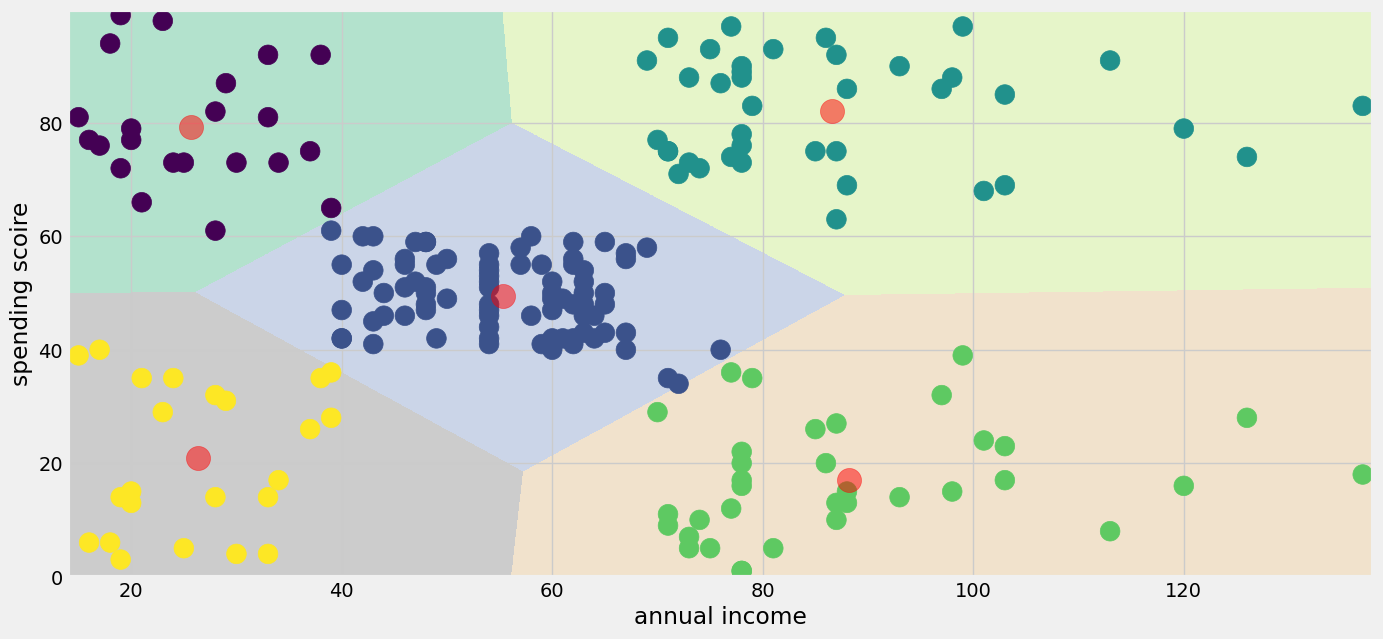

In [27]:
plt.figure(1,figsize=(15,7))
plt.clf()
z2=z2.reshape(xx.shape)
plt.imshow(z2,interpolation='nearest',extent=(xx.min(),xx.max(),yy.min(),yy.max()),cmap=plt.cm.Pastel2,aspect='auto',origin='lower')
plt.scatter(x='Annual Income (k$)',y = 'Spending Score (1-100)',data=df,c=labels2,s=200)
plt.scatter(x=centroids2[:,0],y=centroids2[:,1],s=300,c='red',alpha=0.5)
plt.ylabel("spending scoire")
plt.xlabel('annual income')
plt.show()

In [28]:
#Segmentation using age, annual income and spending score
x3 = df[['Age','Annual Income (k$)','Spending Score (1-100)']].iloc[:,:].values
inertia = []
for n in range (1,11):
  algorithm = KMeans(n_clusters=n ,init='k-means++',n_init=10,max_iter=300,tol=0.0001,random_state=11,algorithm='elkan')
  algorithm.fit(x3)
  inertia.append(algorithm.inertia_)

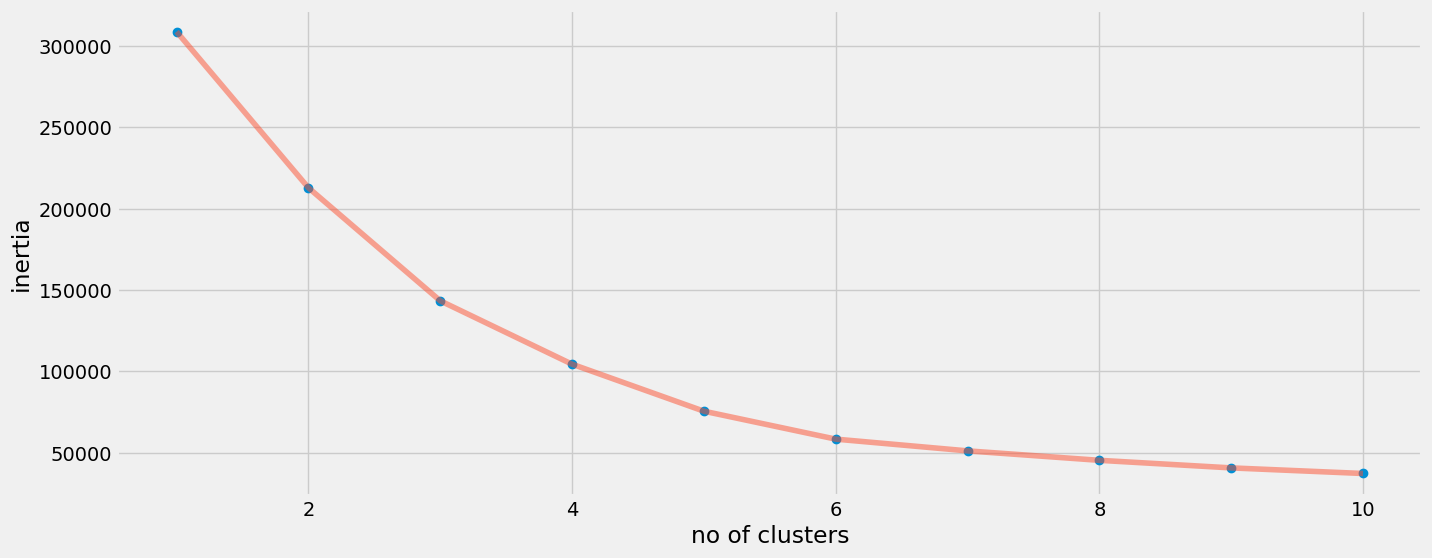

In [29]:
plt.figure(1,figsize=(15,6))
plt.plot(np.arange(1,11),inertia,'o')
plt.plot(np.arange(1,11),inertia,'-',alpha=0.5)
plt.xlabel('no of clusters')
plt.ylabel('inertia')
plt.show()

In [30]:
algorithm=(KMeans(n_clusters=6,init='k-means++',n_init=10,max_iter=300,tol=0.0001,random_state=111,algorithm='elkan'))
algorithm.fit(x3)
labels3=algorithm.labels_
centroids3=algorithm.cluster_centers_

In [34]:
df['labels3']=labels3
trace1 = go.Scatter3d(
    x=df['Age'],
    y=df['Spending Score (1-100)'],
    z=df['Annual Income (k$)'],
    mode='markers',
    marker=dict(
        color=df['labels3'],
        size=20,
        line=dict(
            color=df['labels3'],
            width=12
        ),
        opacity=0.8
    )
)
data=[trace1]
layout=go.Layout(
title='Clusters',
scene=dict(
    xaxis=dict(title='Age'),
    yaxis=dict(title='Spending Score (1-100)'),
    zaxis=dict(title='Annual Income (k$)')
)
)
fig=go.Figure(data=data,layout=layout)
py.offline.iplot(fig)